In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0 #將每個 pixel 的值從 Int 轉成 floating point 同時做normalize

In [5]:
print(len(X_train)) #training data 總共有60000張圖片

60000


In [6]:
print(X_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

(28, 28)


In [7]:
# 開始建model
# 利用 "Sequential" 把每層 layer 疊起來

# input 大小為 28 x 28

# 最後的 Dense(10) 且 activation 用 softmax
# 代表最後 output 為 10 個 class （0~9）的機率
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# model每層定義好後需要經過compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
# 將搭好的 model 去 fit 我們的 training data
# 並evalutate 在 testing data 上
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2943 - accuracy: 0.9154
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1415 - accuracy: 0.9579
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1057 - accuracy: 0.9679
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0875 - accuracy: 0.9727
Epoch 5/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0756 - accuracy: 0.9764
10000/10000 - 1s - loss: 0.0758 - accuracy: 0.9757


[0.07576700633405707, 0.9757]

In [9]:
#將訓練出的model儲存
model.save('mnist.MLPmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist.MLPmodel\assets


In [10]:
#開始進行手寫數字預測
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('data\\img\\number2.jpg')

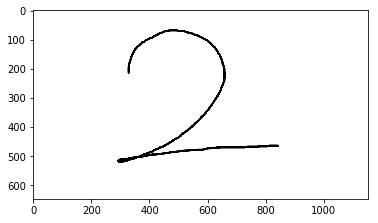

In [11]:
plt.imshow(img)

In [12]:
import numpy as np
image = np.array(img.resize((28, 28)).convert('L'))

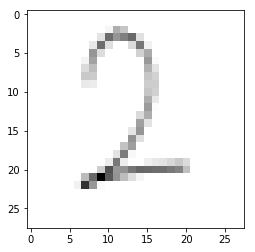

In [13]:
plt.imshow(image, cmap='gray')

In [14]:
image = (255 - image) / 255.0

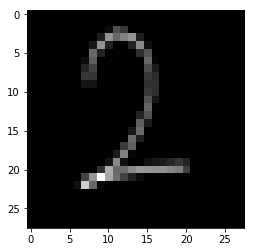

In [15]:
plt.imshow(image, cmap='gray')

In [16]:
image = image.reshape(1,28, 28)

In [17]:
from tensorflow.keras.models import load_model
model = load_model('mnist.MLPmodel')

In [18]:
prediction = model.predict_classes(image)
print(prediction)

[2]
